In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os.path

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv('my_data/cleaned_health_data.csv')

At this point of the project, I have come to the realization that some of the features/columns that I had kept were things that aren't needed for the project, they were simply things that I was curious about, such as how different health behaviors impacted life quality later down the line.... where these aren't things that are important to the project though, and are just making things more complicated, I will be dropping them from the dataframe (as well as repetative columns such as dietary fat subfields)...

In [3]:
drop_cols = ['#_in_house','house_income','Triglycerides', 'difficult_walk', 'difficult_bath', 'time_sitting',
       'diabetes_risk', 'healthy_diet', 'money_market', 'money_fastfood',
       'amt_sleep', 'trouble_sleep','total_sat_fat', 'total_monun_fat', 'total_polun_fat',
       'total_cholesterol']
df = df.drop(columns=drop_cols)
df.shape

(8531, 16)

My main hypothesis is that a high carbohydrate intake will lead to greater weight, as carbohydrates induce a greater insulin response which is attributed to weight gain and inability to lose weight at the same time. I think that the individuals who have a lower carbohydrate intake, will suqsequently have lower weights, BMI's, etc. I think that the weight column will be a good candidate for the dependant variable

(array([1.357e+03, 9.010e+02, 2.304e+03, 2.423e+03, 1.079e+03, 3.310e+02,
        8.700e+01, 3.800e+01, 9.000e+00, 2.000e+00]),
 array([  3.3 ,  25.23,  47.16,  69.09,  91.02, 112.95, 134.88, 156.81,
        178.74, 200.67, 222.6 ]),
 <BarContainer object of 10 artists>)

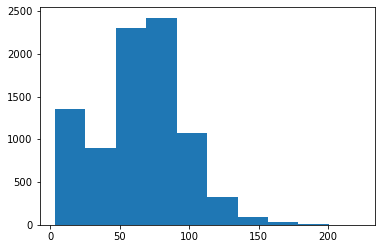

In [4]:
plt.hist(df['weight'])

In [5]:
print(df['weight'].describe())
print("# different values: ",len(df['weight'].value_counts()))

count    8531.000000
mean       64.732517
std        31.548570
min         3.300000
25%        44.900000
50%        67.100000
75%        84.800000
max       222.600000
Name: weight, dtype: float64
# different values:  1358


<AxesSubplot:>

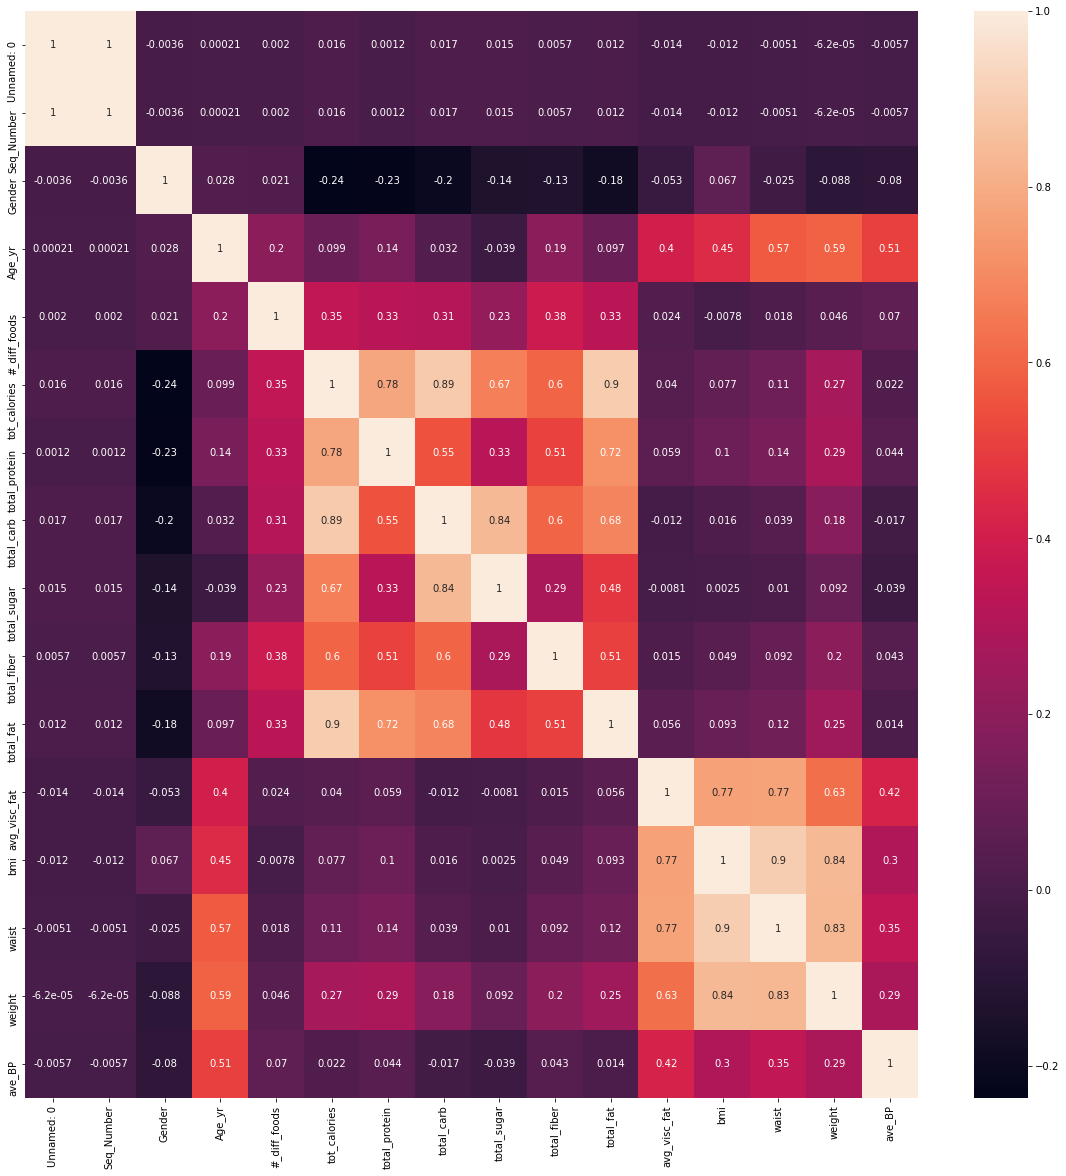

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

After some initial exploration, it was determined that the main chunk of my data didn't have incredibly strong correlations/relationships. Because of this, I want to split the observations into categories based on the individuals age, as results from health/nutrition habits can vary greatly by age.

In [7]:
mylist = df['Age_yr'].unique()
df['age_grp'] = 'adult'
df.loc[df['Age_yr'] <= 18, 'age_grp'] = 'child'
#df.loc[df['Age_yr'] >= 60, 'age_grp'] = 'senior'

Here I am wanting some further visualizations:
-For this I created some functions that will loop through columns of my choice and create subplots to show the visualization of choice.

## Scatter Plots

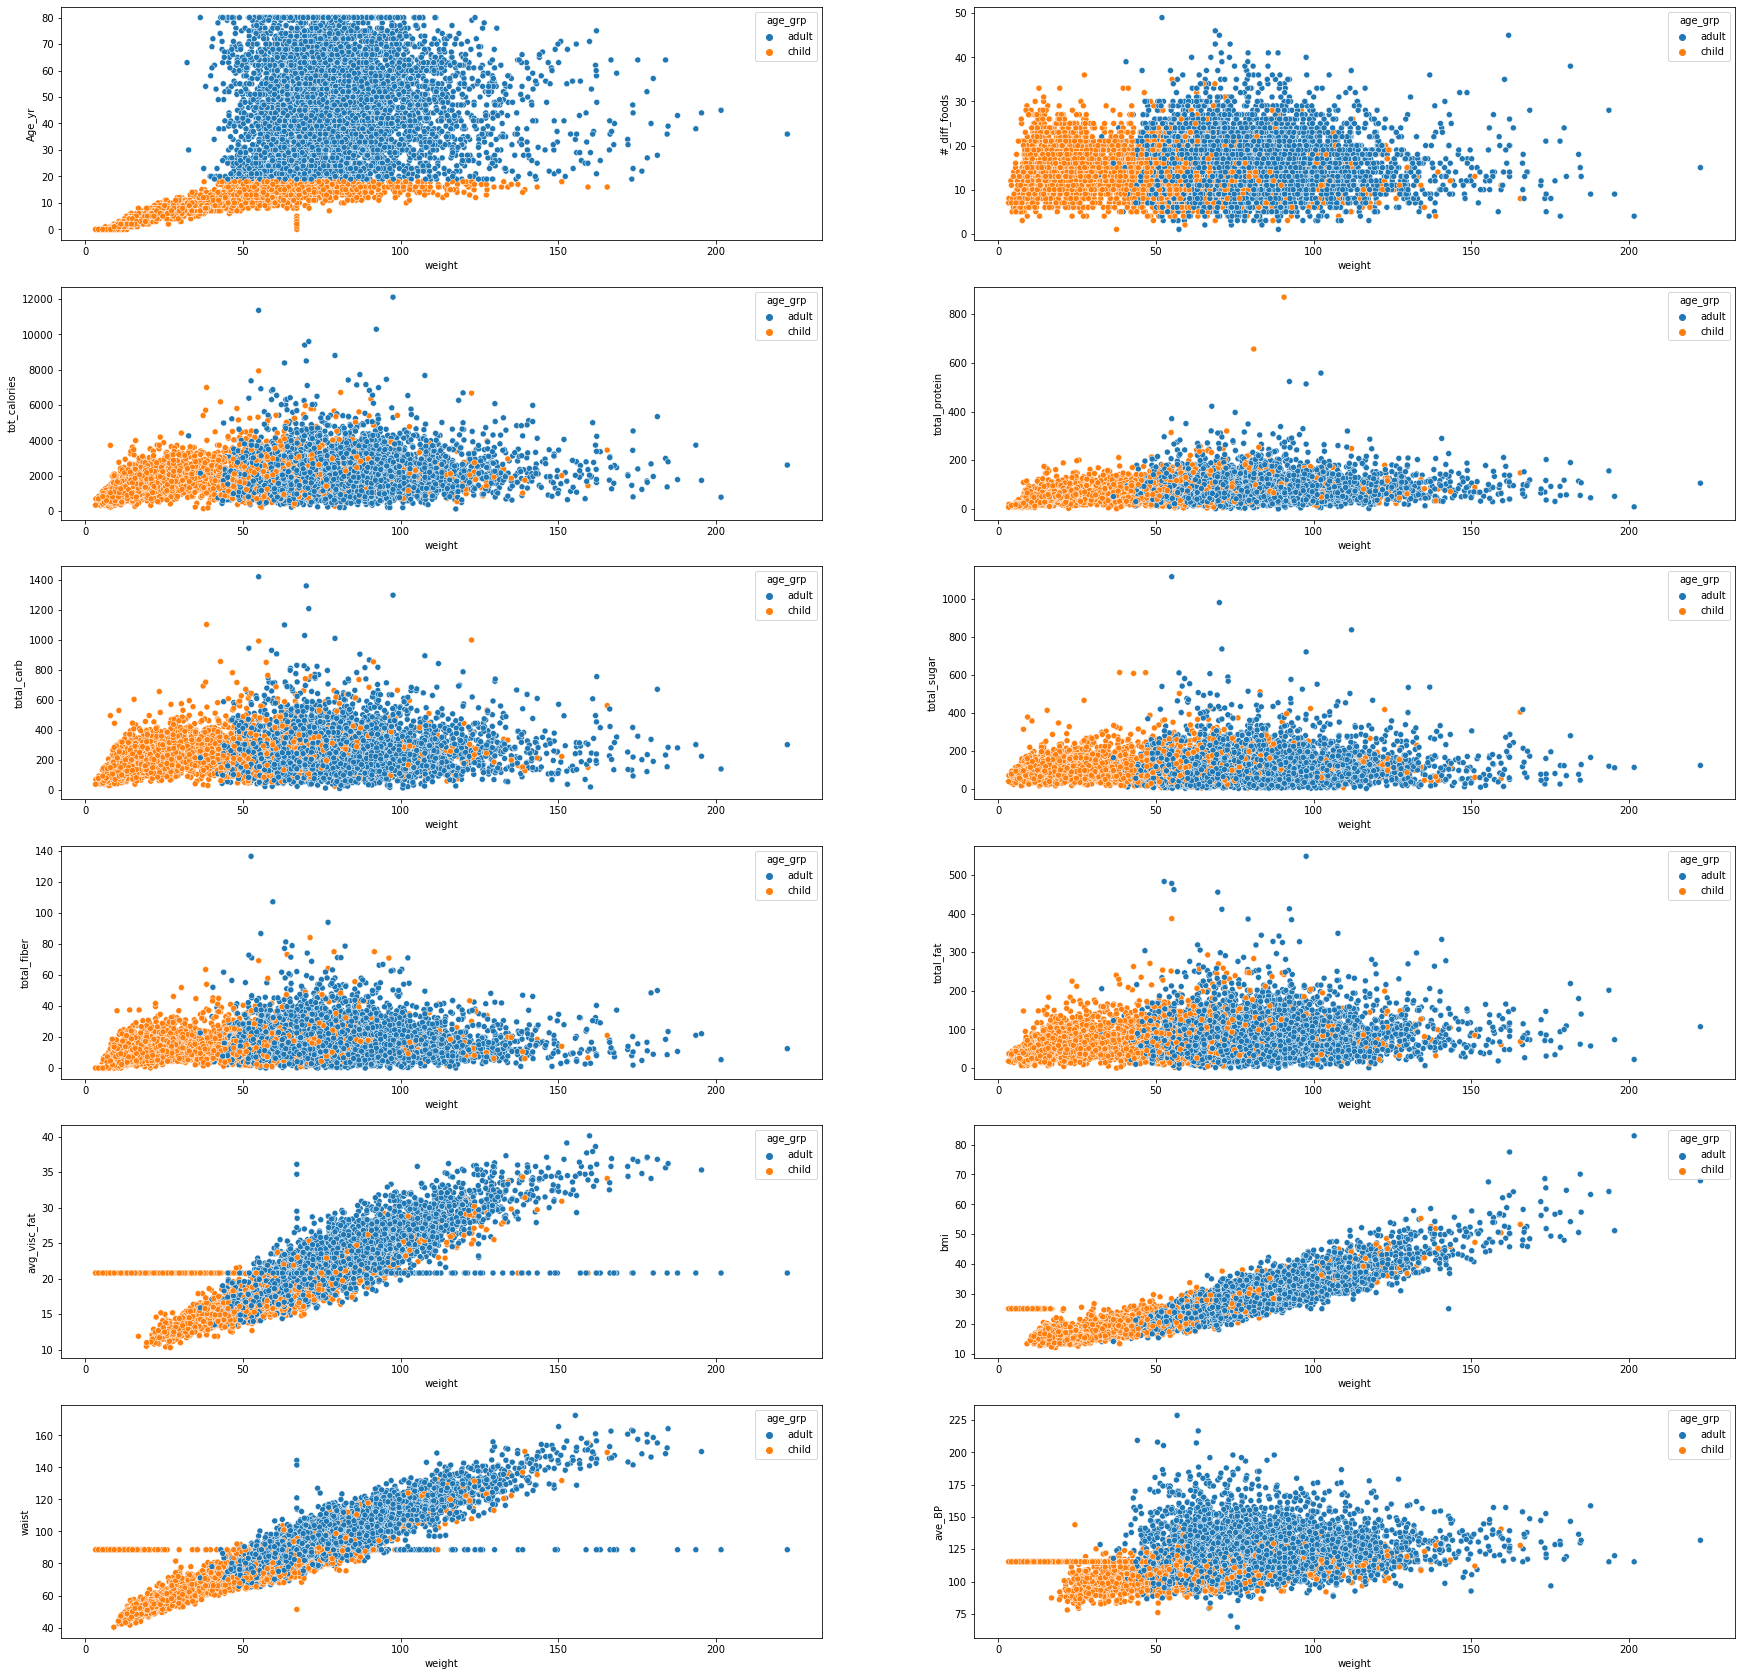

In [8]:
my_cols = ['Age_yr', '#_diff_foods', 'tot_calories', 'total_protein',
       'total_carb', 'total_sugar', 'total_fiber', 'total_fat',
        'avg_visc_fat', 'bmi', 'waist', 'ave_BP']

def my_subplots(plot_type,x_value, y_list,hue):
    plt.figure(figsize=(30,30))
    for i in range(len(y_list)):
        plt.subplot(round(len(y_list)/2),2,(i+1))
        plot_type(x=x_value, y=y_list[i],hue=hue,data=df)

my_subplots(sns.scatterplot,'weight', my_cols, 'age_grp')

## Box Plots

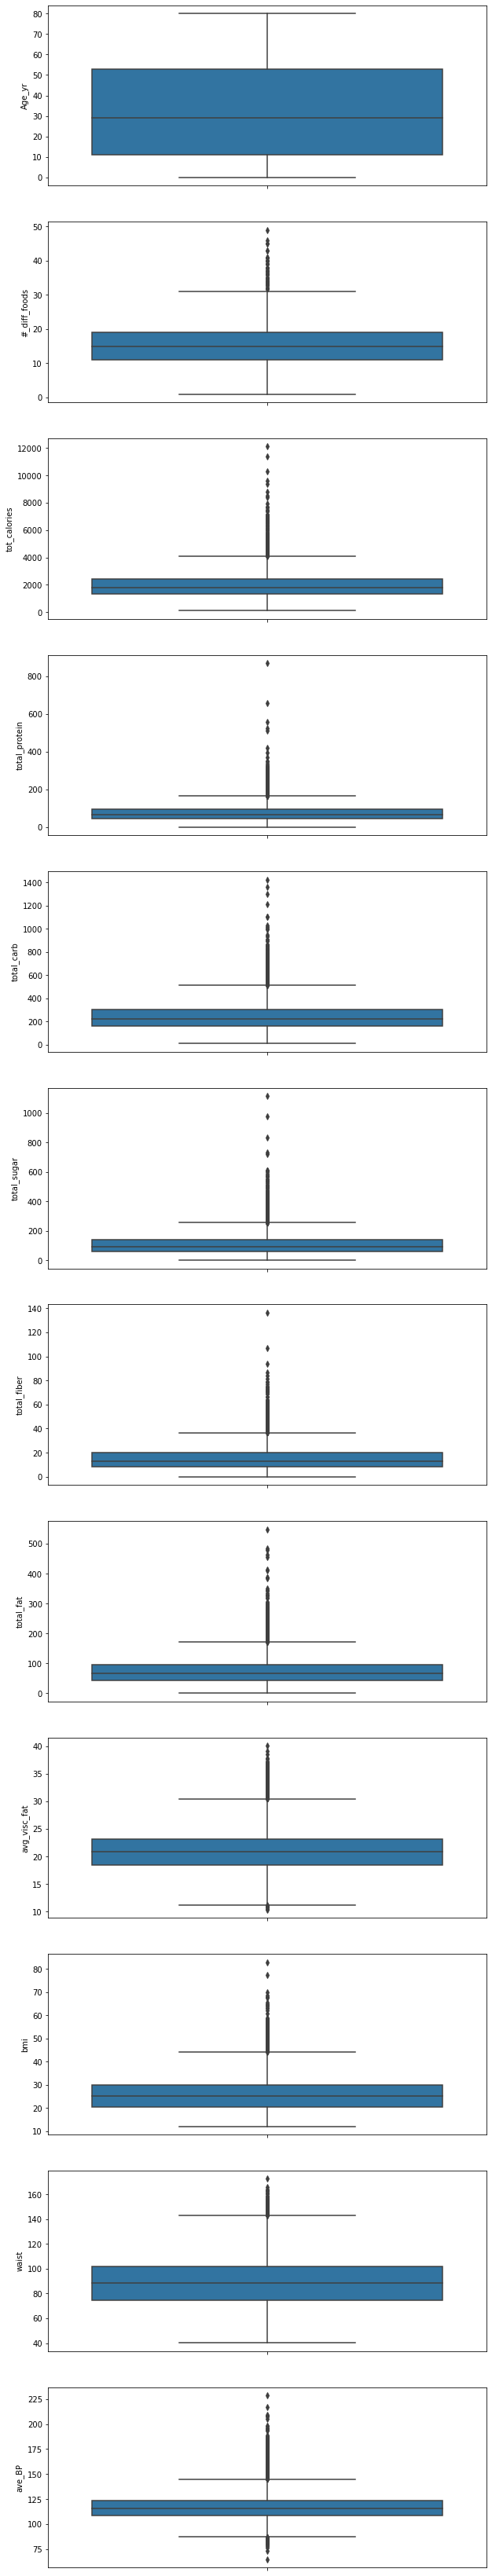

In [9]:
def my_boxplot(cols):
    plt.figure(figsize=(10,len(cols) *5))
    for i in range(len(cols)):
        plt.subplot(len(cols),1,(i+1))
        sns.boxplot(y=cols[i],data=df)

my_boxplot(my_cols)

Some surprises from the EDA was that some macronutrient categories (such as carbohydrates/sugars) didn't have more of a positive linear relationship.... Obviously there are many variables that go into something such as weight, I was hoping for more of a relationship there though, which was disappointing.... Overall, This notebook was useful though as it led me to dropping some repetitive and/or unnecessary columns which really cleaned up the dataframe. I am looking forward to some of the modelling/ML modules and see if we can further pinpoint what behaviors lead to desireable health outcomes